## 필요 모듈 불러오기

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import glob
from PIL import Image
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

In [2]:
cd /content/drive/MyDrive/안봐도보이조_project

/content/drive/.shortcut-targets-by-id/1SJQekhA0CeMNytl0fjgy05kskJWHvJRt/안봐도보이조_project


## 이미지 생성기 선언

In [3]:
train_datagen = ImageDataGenerator( 
        rescale=1./255,         # 픽셀 값을 0~1 범위로 변환
        rotation_range=40,      # 40도까지 회전
        width_shift_range=0.2,  # 20%까지 좌우 이동
        height_shift_range=0.2, # 20%까지 상하 이동
        shear_range=0.2,        # 20%까지 기울임
        zoom_range=0.2,         # 20%까지 확대
        horizontal_flip=True,   # 좌우 뒤집기
    )
train_generator = train_datagen.flow_from_directory(
    './train_10',
    batch_size=64,      
    class_mode='categorical', 
    target_size=(128, 128)) 
valid_datagen = ImageDataGenerator(rescale=1./255) # 스케일링만 진행
valid_generator = valid_datagen.flow_from_directory('./valid_10',
                                                    batch_size=16,      
                                                    class_mode='categorical', 
                                                    target_size=(128, 128))

test_datagen = ImageDataGenerator(rescale=1./255) # 스케일링만 진행
test_generator = test_datagen.flow_from_directory('./test_10',
                                                  batch_size=8,      
                                                  class_mode='categorical', 
                                                  target_size=(128, 128),shuffle=False)

Found 10529 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


## 모델 생성 및 학습
- ResNet50 모델 사용
- early_stopping, modelcheckpoint 적용

In [10]:
resnet50 = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(128 ,128 ,3))

model = Sequential()
model.add(resnet50)
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                327690    
                                                                 
Total params: 23,915,402
Trainable params: 23,862,282
Non-trainable params: 53,120
_________________________________________________________________


In [11]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [13]:
model_path = './김강산/model/RedNet50_05.hdf5'

checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [14]:
history = model.fit(train_generator,
                    steps_per_epoch=100, 
                    epochs=100,
                    validation_data=valid_generator,
                    validation_steps=30,
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 0.9888 - accuracy: 0.8336
Epoch 1: val_loss improved from inf to 10095606784.00000, saving model to ./김강산/model/RedNet50_05.hdf5
100/100 [==============================] - 212s 2s/step - loss: 0.9888 - accuracy: 0.8336 - val_loss: 10095606784.0000 - val_accuracy: 0.0833
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 0.4447 - accuracy: 0.9359
Epoch 2: val_loss improved from 10095606784.00000 to 2.31440, saving model to ./김강산/model/RedNet50_05.hdf5
100/100 [==============================] - 118s 1s/step - loss: 0.4447 - accuracy: 0.9359 - val_loss: 2.3144 - val_accuracy: 0.0938
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.2448 - accuracy: 0.9595
Epoch 3: val_loss did not improve from 2.31440
100/100 [==============================] - 88s 877ms/step - loss: 0.2448 - accuracy: 0.9595 - val_loss: 2.5513 - val_accuracy: 0.0875
Epoch 4/100
100/100 [===========

In [15]:
model.evaluate(test_generator)

63/63 [==============================] - 281s 5s/step - loss: 0.0030 - accuracy: 1.0000


[0.003037533024325967, 1.0]

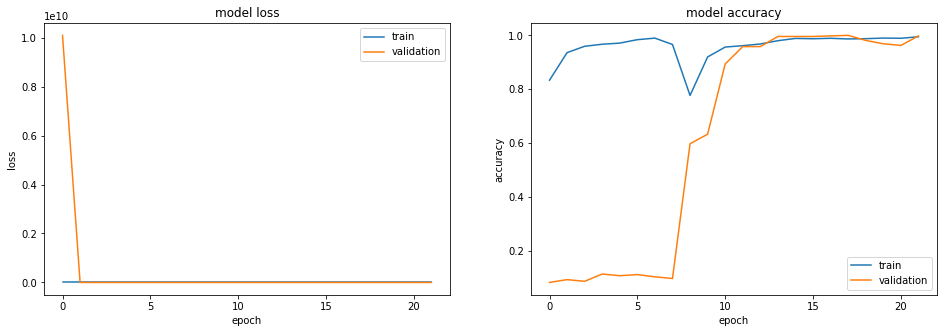

In [16]:
# 모델 학습 과정 시각화
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc=0)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc=0)

In [ ]:
pred.argmax()

In [ ]:
train_generator.class_indices

In [ ]:
result_dict = dict(map(reversed, train_generator.class_indices.items()))
# 딕셔너리의 key, values 뒤집기
result_dict

In [ ]:
result_dict[pred.argmax()]

In [ ]:
categories = list(result_dict.values())
# 딕셔너리의 value 값을 리스트로 받기
categories

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

np.set_printoptions(precision=2)

Y_pred = model.predict(test_generator)
classes = test_generator.classes[test_generator.index_array]
y_pred = np.argmax(Y_pred, axis=1)  # Returns maximum indices in each row

class_names = categories

print('-- Confusion Matrix --')
print(confusion_matrix(classes, y_pred))



print('-- Classification Report --')
print(classification_report(classes, y_pred, target_names=class_names))